<h1 style="color:green; text-align:center; font-size:50px">House price prediction</h1>

In [59]:
from IPython.display import YouTubeVideo

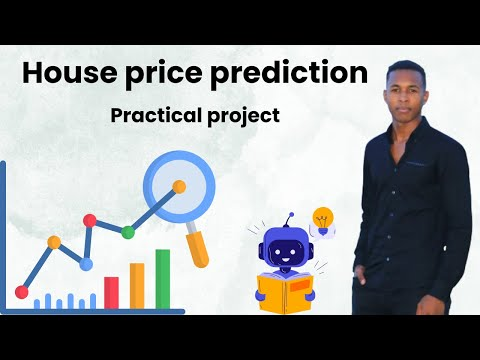

In [60]:
YouTubeVideo('CXIiK4IHK6E', width=800, height=450)

In [18]:
#ignoring the warnings while executing codes
import warnings
warnings.filterwarnings("ignore")

# 1-Data loading and exploring

In [19]:
import pandas as pd

In [20]:
data = pd.read_csv("Dataset/train.csv")
data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [21]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
data.describe().T.style.bar(subset=['mean'], color="red").set_table_styles([
    {'selector': 'tr:hover', 'props':[('background-color', 'red')]}
]).background_gradient(subset=['mean', '25%', '75%'])

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

### Sale price distribution using matplotlib

Text(0.5, 1.0, 'Price distribution')

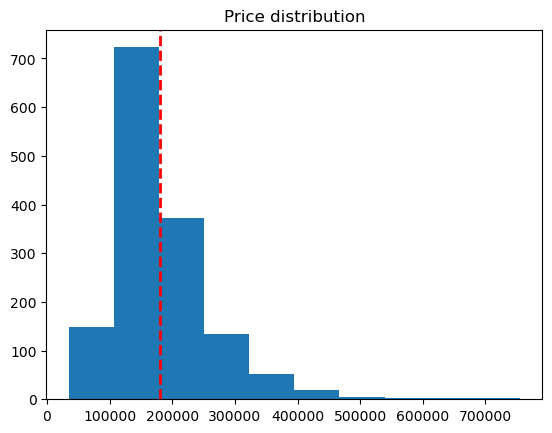

In [29]:
plt.hist(data['SalePrice'])
plt.axvline(data['SalePrice'].mean(), color="red", linewidth=2, linestyle='--')
plt.title("Price distribution")


### Sale price distribution using seaborn

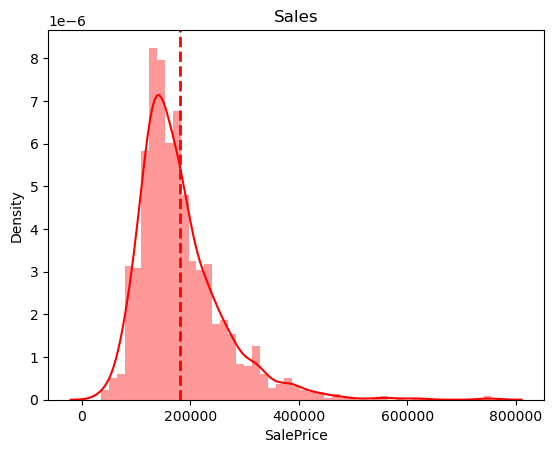

In [30]:
#checking the target variables for distribution
sns.distplot(data['SalePrice'],color='red')
plt.axvline(x=data['SalePrice'].mean(), color='red', linestyle='--', linewidth=2)
plt.title('Sales');

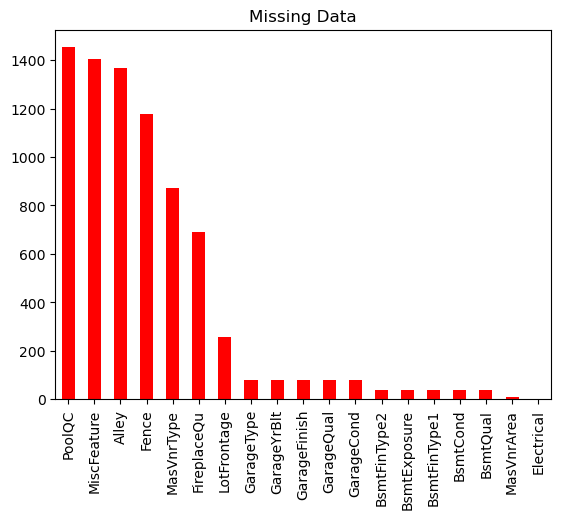

In [31]:
#checking missing values
missing = data.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color='red')
plt.title('Missing Data');

In [32]:
data.drop(['Id','MiscFeature','PoolQC','Fence','Alley','LotFrontage','MasVnrType','FireplaceQu'], axis=1)

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
3             70       RL     9550   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch  \
0       Inside       Gtl      CollgCr  ...             0         0   
1          FR2       Gtl      Veenker  ...             0         0   
2       Inside       Gtl      CollgCr  ...             0         0   
3       Corner       Gtl      Crawfor  ...           272         0   
4          FR2       Gtl      NoRidge  ...             0         0   
...        ...       ...          ...  ...           ...       ...   
1455    Inside       Gtl      Gilbert  ...             0         0   
1456    Inside       Gtl       NWAmes  ...             0         0   
1457    Inside       Gtl      Crawfor  ...             0         0   
1458    Inside       Gtl        NAmes  ...           112         0   
1459    Inside       Gtl      Edwards  ...             0         0   

     ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  \
0              0        0        0       2    2008        WD        Normal   
1              0        0        0       5    2007        WD        Normal   
2              0        0        0       9    2008        WD        Normal   
3              0        0        0       2    2006        WD       Abnorml   
4              0        0        0      12    2008        WD        Normal   
...          ...      ...      ...     ...     ...       ...           ...   
1455           0        0        0       8    2007        WD        Normal   
1456           0        0        0       2    2010        WD        Normal   
1457           0        0     2500       5    2010        WD        Normal   
1458           0        0        0       4    2010        WD        Normal   
1459           0        0        0       6    2008        WD        Normal   

     SalePrice  
0       208500  
1       181500  
2       223500  
3       140000  
4       250000  
...        ...  
1455    175000  
1456    210000  
1457    266500  
1458    142125  
1459    147500  

[1460 rows x 73 columns]

### get the numeric and the categorical columns

In [33]:
num_cols = [col for col in data.columns if data[col].dtype in ['float64','int64']]
cat_cols = [col for col in data.columns if data[col].dtype not in ['float64','int64']]
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# 2-Data preprocessing

In [58]:
from sklearn.impute import SimpleImputer

## Fill the missing values

In [35]:
simpleImputer = SimpleImputer(strategy='mean')
data[num_cols] = simpleImputer.fit_transform(data[num_cols])
simpleImputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = simpleImputer.fit_transform(data[cat_cols])

In [43]:
### check the missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values>0]
missing_values

Series([], dtype: int64)

## Normalize the numeric columns

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
minMaxScaler = MinMaxScaler()
data[num_cols] = minMaxScaler.fit_transform(data[num_cols])

### Represent categorical variables as numerical values using OneHotEncoder

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
cat_cols = [col for col in data.columns if data[col].dtype not in ['float64','int64','<U13'] ]

In [46]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(data[cat_cols])
encoder_names = encoder.get_feature_names_out(cat_cols)
data[encoder_names] = encoder.transform(data[cat_cols])

### Concatinate the preprocessed columns and data spliting

In [48]:
import numpy as np
new_cols = np.concatenate((encoder_names, num_cols))
X = data[new_cols].drop(['SalePrice'], axis=1)
y = data['SalePrice']


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=45)

X_test

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
285                0.0          1.0          0.0          0.0          0.0   
872                0.0          0.0          0.0          1.0          0.0   
343                0.0          0.0          0.0          1.0          0.0   
403                0.0          0.0          0.0          1.0          0.0   
1322               0.0          0.0          0.0          1.0          0.0   
...                ...          ...          ...          ...          ...   
291                0.0          0.0          0.0          1.0          0.0   
774                0.0          0.0          0.0          1.0          0.0   
87                 0.0          1.0          0.0          0.0          0.0   
300                0.0          0.0          0.0          1.0          0.0   
116                0.0          0.0          0.0          1.0          0.0   

      Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  LotShape_IR1  ...  \
285           0.0          1.0         0.0         1.0           1.0  ...   
872           0.0          1.0         1.0         0.0           0.0  ...   
343           0.0          1.0         1.0         0.0           1.0  ...   
403           0.0          1.0         1.0         0.0           0.0  ...   
1322          0.0          1.0         1.0         0.0           1.0  ...   
...           ...          ...         ...         ...           ...  ...   
291           0.0          1.0         1.0         0.0           0.0  ...   
774           0.0          1.0         1.0         0.0           0.0  ...   
87            0.0          1.0         0.0         1.0           0.0  ...   
300           0.0          1.0         1.0         0.0           0.0  ...   
116           0.0          1.0         1.0         0.0           0.0  ...   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
285     0.372355    0.000000     0.098720       0.000000        0.0   
872     0.291961    0.228705     0.000000       0.271739        0.0   
343     0.397743    0.577596     0.131627       0.000000        0.0   
403     0.296192    0.168028     0.224863       0.000000        0.0   
1322    0.397743    0.280047     0.071298       0.000000        0.0   
...          ...         ...          ...            ...        ...   
291     0.000000    0.000000     0.336380       0.000000        0.0   
774     0.631171    0.367561     0.082267       0.000000        0.0   
87      0.372355    0.000000     0.427788       0.000000        0.0   
300     0.264457    0.000000     0.000000       0.000000        0.0   
116     0.203103    0.000000     0.036563       0.260870        0.0   

      ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  
285           0.0       0.0      0.0  0.454545    0.25  
872           0.0       0.0      0.0  0.818182    0.50  
343           0.0       0.0      0.0  0.545455    0.50  
403           0.0       0.0      0.0  0.545455    0.00  
1322          0.0       0.0      0.0  0.454545    1.00  
...           ...       ...      ...       ...     ...  
291           0.0       0.0      0.0  0.181818    0.50  
774           0.0       0.0      0.0  0.545455    0.25  
87            0.0       0.0      0.0  0.454545    0.75  
300           0.0       0.0      0.0  0.454545    0.00  
116           0.0       0.0      0.0  0.727273    0.75  

[365 rows x 288 columns]

# 3-Training

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [54]:
models = {
    'linearRegression': LinearRegression(),
    'svr': SVR(),
    'randomForestRegressor': RandomForestRegressor()
}

In [57]:
scores = []
for name,model in models.items():
    model = model.fit(X_train,y_train)
    predict = model.predict(X_test)
    score = np.sqrt(mean_squared_error(predict, y_test))
    print(f"The RMSE of {name} is: {score}")
    scores.append(score)
    

The RMSE of linearRegression is: 21447487947.20221
The RMSE of svr is: 0.05785551969397891
The RMSE of randomForestRegressor is: 0.03666709741086158


### Training using GridSearch for hyperparameters optimization

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the models
models = {
    'linearRegression': LinearRegression(),
    'svr': SVR(),
    'randomForestRegressor': RandomForestRegressor()
}

# Define parameter grids for each model
param_grids = {
    'linearRegression': {
        'fit_intercept': [True, False],
        'positive': [True, False]
    },
    'svr': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'randomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# Dictionary to store the best models
best_models = {}

# Perform grid search for each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Evaluate the best models
scores = []
for name, model in best_models.items():
    predict = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predict))
    print(f"The RMSE of {name} is: {score}")
    scores.append(score)


The RMSE of linearRegression is: 0.04045740758064498
The RMSE of svr is: 0.05392534477312473
The RMSE of randomForestRegressor is: 0.037705234104580015
